In [62]:
try:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import requests
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import StratifiedShuffleSplit
    import category_encoders as ce
    from sklearn.preprocessing import LabelEncoder
    import seaborn as sns
    from sklearn.model_selection import train_test_split

except ImportError as e:
    print(e)

# read data

In [34]:
df = pd.read_csv(r"Datasets\flight_data.csv",index_col=0)
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


In [36]:
isinstance(df["airline"],object)

True

In [51]:
col_lst = []
for col in df.columns:
    if df[col].dtype== object:
        print(col,":",df[col].nunique())
        col_lst.append(col)
        # df.nunique()

print(df[col_lst[1]].unique())
print(df[col_lst[2]].unique())

flight : 1561
departure_time : 6
arrival_time : 6
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']


In [52]:
df_encoded = pd.get_dummies(df, columns=['departure_time'])
df_encoded

,airline,flight,source_city,stops,arrival_time,destination_city,class,duration,days_left,price,departure_time_Afternoon,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night
0,0,SG-8709,0,0,Night,1,0,2.17,1,5953,False,False,True,False,False,False
1,0,SG-8157,0,0,Morning,1,0,2.33,1,5953,False,True,False,False,False,False
2,1,I5-764,0,0,Early_Morning,1,0,2.17,1,5956,False,True,False,False,False,False
3,2,UK-995,0,0,Afternoon,1,0,2.25,1,5955,False,False,False,False,True,False
4,2,UK-963,0,0,Morning,1,0,2.33,1,5955,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,2,UK-822,5,1,Evening,4,1,10.08,49,69265,False,False,False,False,True,False
300149,2,UK-826,5,1,Night,4,1,10.42,49,77105,True,False,False,False,False,False
300150,2,UK-832,5,1,Night,4,1,13.83,49,79099,False,True,False,False,False,False
300151,2,UK-828,5,1,Evening,4,1,10.00,49,81585,False,True,False,False,False,False


In [44]:
print(df['stops'].unique())
print(df['class'].unique())
print(df['source_city'].unique())
print(df['destination_city'].unique())
print(df['airline'].unique())


['zero' 'one' 'two_or_more']
['Economy' 'Business']
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']


In [53]:
mapping_values = {'zero': 0,'one': 1,'two_or_more': 2,"Economy":0,"Business":1,'Delhi':0 ,'Mumbai':1, 'Bangalore':2, 'Kolkata':3, 'Hyderabad':4, 'Chennai':5,'SpiceJet':0, 'AirAsia':1, 'Vistara':2, 'GO_FIRST':3, 'Indigo':4, 'Air_India':5,'Evening':1, 'Early_Morning':2, 'Morning':0, 'Afternoon':3, 'Night':4, 'Late_Night':5}
df['stops'] = df['stops'].replace(mapping_values).astype(int)
df['class'] = df['class'].replace(mapping_values).astype(int)
df['source_city'] = df['source_city'].replace(mapping_values).astype(int)
df['destination_city'] = df['destination_city'].replace(mapping_values).astype(int)
df['airline'] = df['airline'].replace(mapping_values).astype(int)
df['departure_time'] = df['departure_time'].replace(mapping_values).astype(int)
df['arrival_time'] = df['arrival_time'].replace(mapping_values).astype(int)
df

C:\Users\HARSH\AppData\Local\Temp\ipykernel_13744\2647827966.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['departure_time'] = df['departure_time'].replace(mapping_values).astype(int)
C:\Users\HARSH\AppData\Local\Temp\ipykernel_13744\2647827966.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['arrival_time'] = df['arrival_time'].replace(mapping_values).astype(int)


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SG-8709,0,1,0,4,1,0,2.17,1,5953
1,0,SG-8157,0,2,0,0,1,0,2.33,1,5953
2,1,I5-764,0,2,0,2,1,0,2.17,1,5956
3,2,UK-995,0,0,0,3,1,0,2.25,1,5955
4,2,UK-963,0,0,0,0,1,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,2,UK-822,5,0,1,1,4,1,10.08,49,69265
300149,2,UK-826,5,3,1,4,4,1,10.42,49,77105
300150,2,UK-832,5,2,1,4,4,1,13.83,49,79099
300151,2,UK-828,5,2,1,1,4,1,10.00,49,81585


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int64  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int64  
 3   departure_time    300153 non-null  int64  
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  int64  
 6   destination_city  300153 non-null  int64  
 7   class             300153 non-null  int64  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 27.5+ MB


In [56]:
label_encoder = LabelEncoder()
df['flight'] = label_encoder.fit_transform(df['flight'])
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,1408,0,1,0,4,1,0,2.17,1,5953
1,0,1387,0,2,0,0,1,0,2.33,1,5953
2,1,1213,0,2,0,2,1,0,2.17,1,5956
3,2,1559,0,0,0,3,1,0,2.25,1,5955
4,2,1549,0,0,0,0,1,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,2,1477,5,0,1,1,4,1,10.08,49,69265
300149,2,1481,5,3,1,4,4,1,10.42,49,77105
300150,2,1486,5,2,1,4,4,1,13.83,49,79099
300151,2,1483,5,2,1,1,4,1,10.00,49,81585


<Axes: >

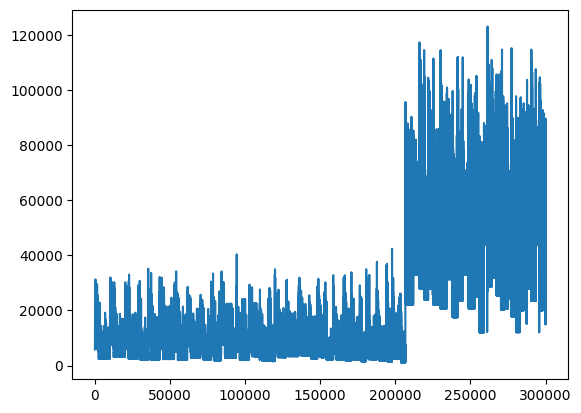

In [57]:
df['price'].plot()

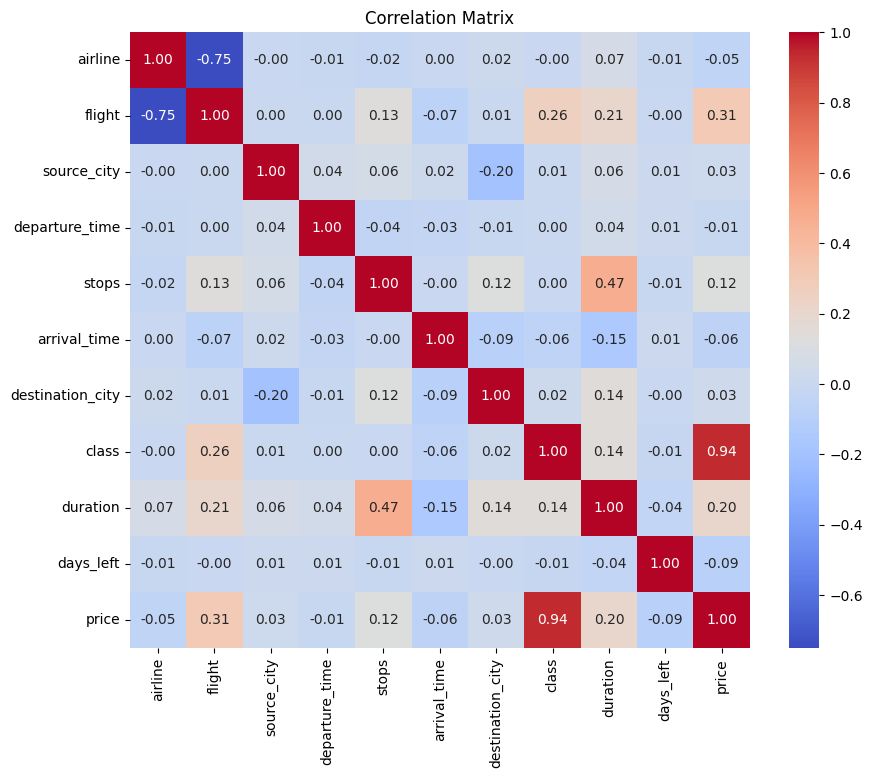

In [60]:
corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

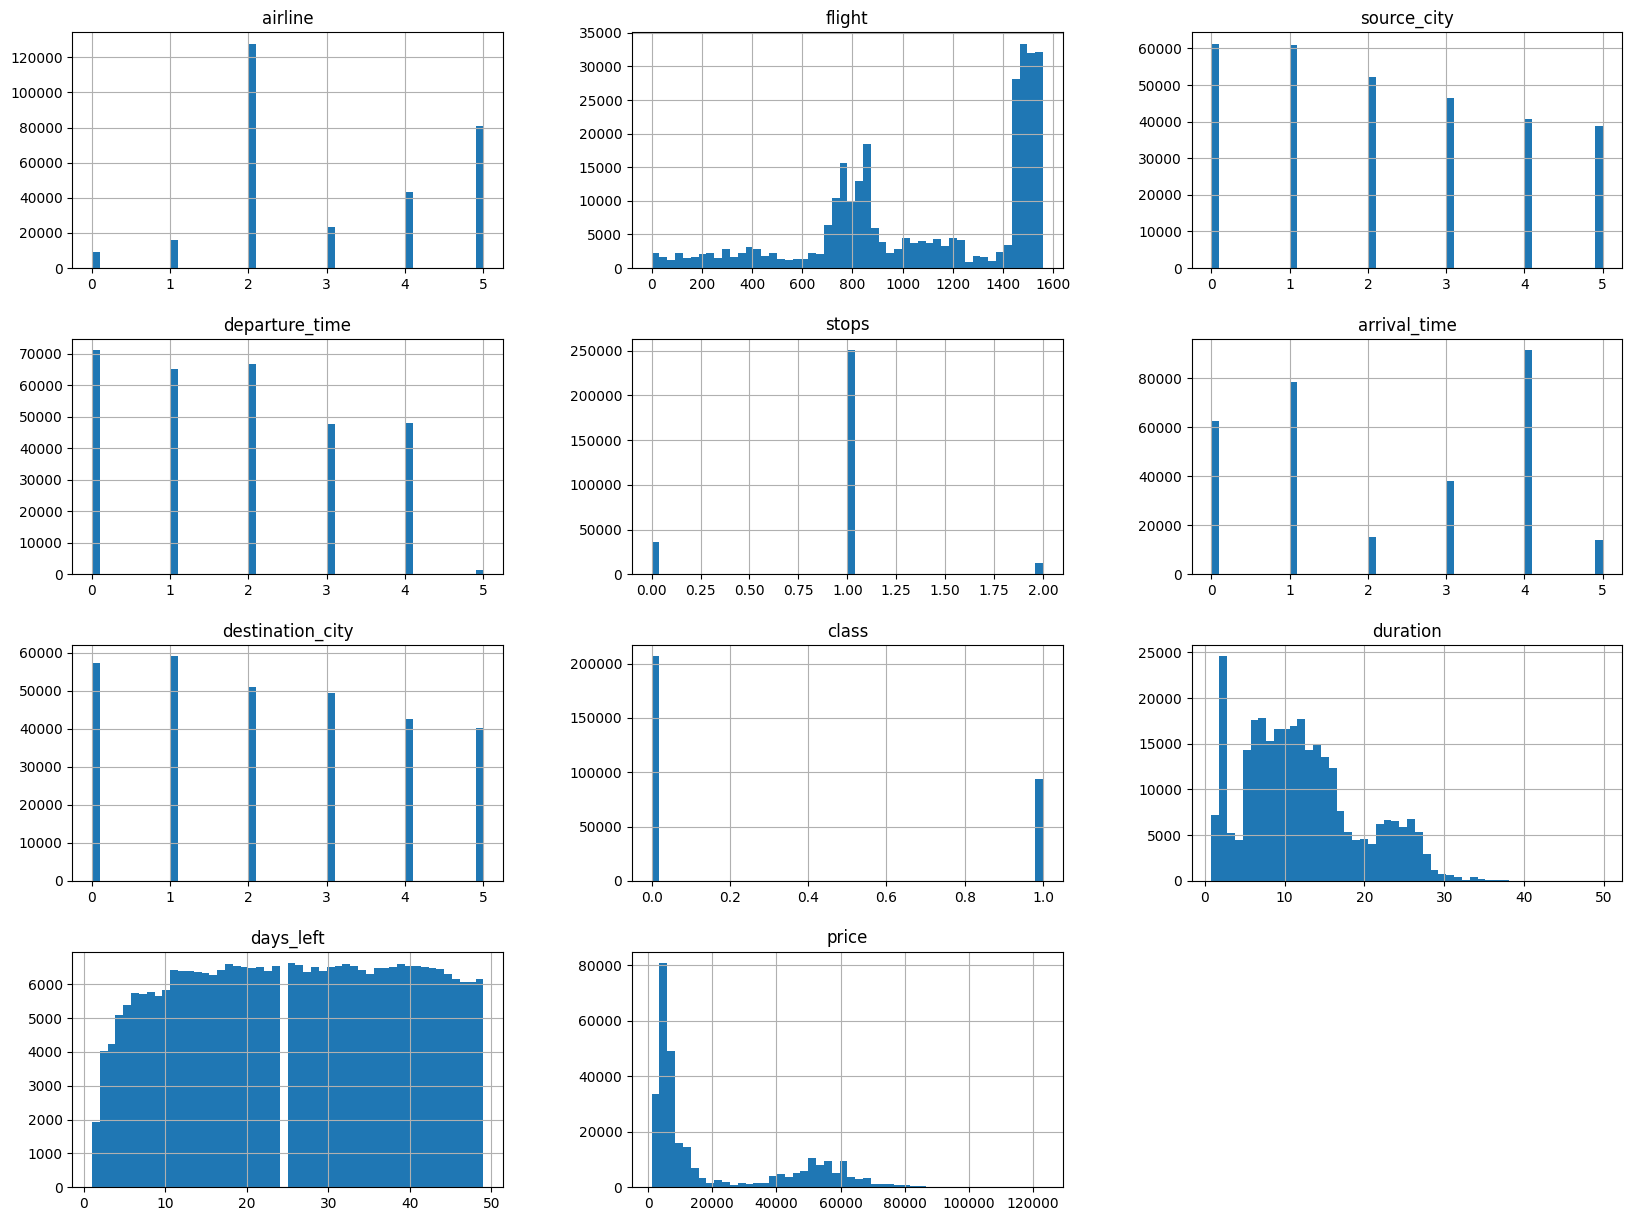

In [61]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [63]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
print("train",len(train_set))
print("test",len(test_set))

train 240122
test 60031


In [89]:
train_set.reset_index(drop=True, inplace= True)
train_set

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,5,714,3,3,1,0,5,0,19.42,6,13524
1,4,110,0,3,2,4,5,0,7.00,13,9940
2,5,845,3,3,1,3,5,1,21.17,44,55983
3,2,1520,4,4,1,2,2,0,10.25,11,7927
4,2,1456,3,4,1,4,5,1,26.50,5,55502
...,...,...,...,...,...,...,...,...,...,...,...
240117,2,1458,3,1,1,3,0,0,20.50,2,22869
240118,2,1513,2,4,1,4,5,1,25.42,7,44280
240119,5,846,3,4,1,0,1,0,13.67,29,5102
240120,3,924,3,3,1,4,4,0,8.33,39,5574


In [90]:
X_train = train_set.drop(['price'],axis=1)
# X_train.reset_index(drop= True,inplace= True)
X_train


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,5,714,3,3,1,0,5,0,19.42,6
1,4,110,0,3,2,4,5,0,7.00,13
2,5,845,3,3,1,3,5,1,21.17,44
3,2,1520,4,4,1,2,2,0,10.25,11
4,2,1456,3,4,1,4,5,1,26.50,5
...,...,...,...,...,...,...,...,...,...,...
240117,2,1458,3,1,1,3,0,0,20.50,2
240118,2,1513,2,4,1,4,5,1,25.42,7
240119,5,846,3,4,1,0,1,0,13.67,29
240120,3,924,3,3,1,4,4,0,8.33,39


In [91]:
y_train = train_set['price']
y_train

0         13524
1          9940
2         55983
3          7927
4         55502
          ...  
240117    22869
240118    44280
240119     5102
240120     5574
240121     6339
Name: price, Length: 240122, dtype: int64

In [92]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [93]:
test_set.reset_index(drop= True, inplace= True)
X_test = test_set.drop(['price'],axis= 1)
y_test = test_set['price']

In [94]:
X_test

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,5,748,0,0,1,2,3,0,19.75,40
1,2,1442,3,0,1,4,1,1,9.83,42
2,2,1454,3,0,1,4,2,0,10.50,41
3,2,1479,5,4,1,0,0,1,14.50,14
4,5,743,2,3,1,4,1,0,8.25,20
...,...,...,...,...,...,...,...,...,...,...
60026,5,713,0,2,1,1,1,0,12.58,27
60027,4,262,0,1,0,4,1,0,2.17,29
60028,5,771,4,2,1,4,2,0,13.58,28
60029,4,168,4,1,0,1,3,0,2.00,40


In [96]:
price_pred = lin_reg.predict(X_test)

In [97]:
from sklearn.metrics import mean_squared_error
# housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(price_pred, y_test)
lin_mse

np.float64(49883666.3467068)

In [111]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)


DecisionTreeRegressor()

In [112]:
tree_pred = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

np.float64(2873.9382701462664)

In [113]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, X_test, y_test,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)


In [114]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)

Scores: [3782.61478392 3857.0511919  3765.5132151  3591.09000929 3537.58662704
 3719.05564611 3475.85703677 3665.40911068 3703.81878838 3723.87395689]
Mean: 3682.18703660926
Standard deviation: 111.01035901945923


In [115]:
lin_scores = cross_val_score(lin_reg,X_test, y_test,
scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)


Scores: [7183.1957613  7169.37252002 6978.62182563 7010.91086596 6914.90191661
 7057.76996871 7074.11623275 7071.97938623 7015.8679226  7153.5631692 ]
Mean: 7063.02995689994
Standard deviation: 82.57287396214561


In [117]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)


RandomForestRegressor()

In [118]:
forest_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, tree_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

np.float64(2873.9382701462664)

In [119]:
lin_scores = cross_val_score(forest_reg,X_test, y_test,
scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)


Scores: [2723.94969274 2921.2335901  2846.29915424 2676.67425667 2762.21173748
 2853.23565674 2705.17566354 2801.83491569 2725.01226622 2814.98848518]
Mean: 2783.061541861237
Standard deviation: 73.53216585528006


In [120]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(X_train, y_train)

d:\RND\Machine_Learning\mlenv\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [121]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [122]:
grid_search.best_estimator_


RandomForestRegressor(max_features=8, n_estimators=30)

In [123]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

3262.9081464785445 {'max_features': 2, 'n_estimators': 3}
2766.135899620418 {'max_features': 2, 'n_estimators': 10}
2633.3030934640033 {'max_features': 2, 'n_estimators': 30}
2866.827836653299 {'max_features': 4, 'n_estimators': 3}
2619.55450288421 {'max_features': 4, 'n_estimators': 10}
2540.214468200826 {'max_features': 4, 'n_estimators': 30}
2781.0058483521225 {'max_features': 6, 'n_estimators': 3}
2539.0479346982142 {'max_features': 6, 'n_estimators': 10}
2477.812958047169 {'max_features': 6, 'n_estimators': 30}
2733.214170861234 {'max_features': 8, 'n_estimators': 3}
2496.0709607273106 {'max_features': 8, 'n_estimators': 10}
2426.5198661784148 {'max_features': 8, 'n_estimators': 30}
3199.3286074334446 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
2901.890419185458 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
3036.441879640534 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
2806.264526958967 {'bootstrap': False, 'max_features': 3, 'n_estimator

In [124]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.00573409, 0.04764818, 0.00610677, 0.00247966, 0.00707452,
       0.00276376, 0.01051968, 0.85637271, 0.04310383, 0.01819681])